In [7]:
import pandas as pd 
import numpy as np
from sklearn import metrics 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

# Importing data set 

In [8]:
# loading data set
glass_data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv')
glass_data

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


# Renaming columns 

In [9]:
new_columns_names = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','glass_type']
glass_data.columns = new_columns_names
glass_data.sample(n=10)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
124,126,1.51872,12.93,3.66,1.56,72.51,0.58,8.55,0.00,0.12,2
105,107,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
94,96,1.51860,13.36,3.43,1.43,72.26,0.51,8.60,0.00,0.00,2
175,177,1.51905,14.00,2.39,1.56,72.37,0.00,9.57,0.00,0.00,6
136,138,1.51711,12.89,3.62,1.57,72.96,0.61,8.11,0.00,0.00,2
135,137,1.51806,13.00,3.80,1.08,73.07,0.56,8.38,0.00,0.12,2
26,28,1.51721,12.87,3.48,1.33,73.04,0.56,8.43,0.00,0.00,1
174,176,1.52119,12.97,0.33,1.51,73.39,0.13,11.27,0.00,0.28,5
172,174,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,5
81,83,1.51646,13.41,3.55,1.25,72.81,0.68,8.10,0.00,0.00,2


The label contains multi Class data. But first I will be droping id columns 

In [10]:
glass_data.drop(columns=['Id'], axis =1, inplace = True )
glass_data 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


Id columns has been dropped. 

In [11]:
# checking for nulls values 
glass_data.isnull().sum()

RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
glass_type    0
dtype: int64

<Axes: >

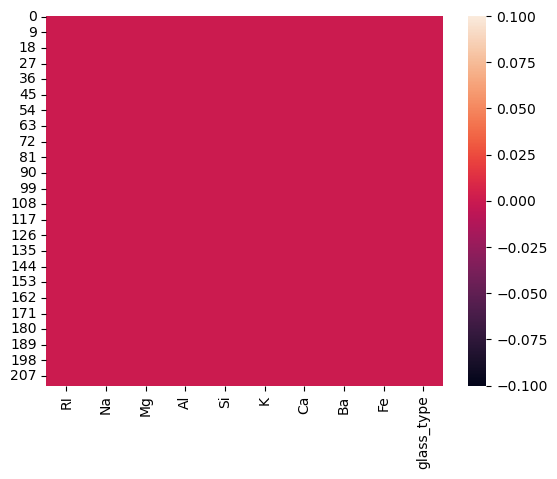

In [12]:
# Visualizing the nulls values using heatmap
sns.heatmap(glass_data.isnull())

No nulls values in the data set

In [13]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RI          213 non-null    float64
 1   Na          213 non-null    float64
 2   Mg          213 non-null    float64
 3   Al          213 non-null    float64
 4   Si          213 non-null    float64
 5   K           213 non-null    float64
 6   Ca          213 non-null    float64
 7   Ba          213 non-null    float64
 8   Fe          213 non-null    float64
 9   glass_type  213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


There are two data types int64 and float 64

In [14]:
glass_data.shape

(213, 10)

This give a brief about the dataset, it contains 213 rows and 10 columns, again no nulls values, memory usage 16.8KB

In [15]:
# Checking number of unique values in each column
glass_data.nunique().to_frame('No. of unique values')

,No. of unique values
RI,177
Na,142
Mg,93
Al,117
Si,132
K,65
Ca,143
Ba,34
Fe,32
glass_type,6


These are the respective columns unique values 

In [16]:
# statistical summary of the dataset
glass_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


The counts values are all same. Though I am observing some skewness and outliers but I will be dividing the glass_type which is the target variable into two categories. 

# Diving the target variable into two categories 1 and 2 

In [17]:
glass_type = []
for i in glass_data['glass_type']:
    if i >= 1 and i <= 4:
        glass_type.append('0')
    elif i >= 5 and i <= 7:
        glass_type.append('1')

glass_data['glass_type'] = glass_type

set(glass_type)

{'0', '1'}

In [18]:
glass_data['glass_type'].unique()

array(['0', '1'], dtype=object)

Now the label variable has been converted into two categories 1 and 2 

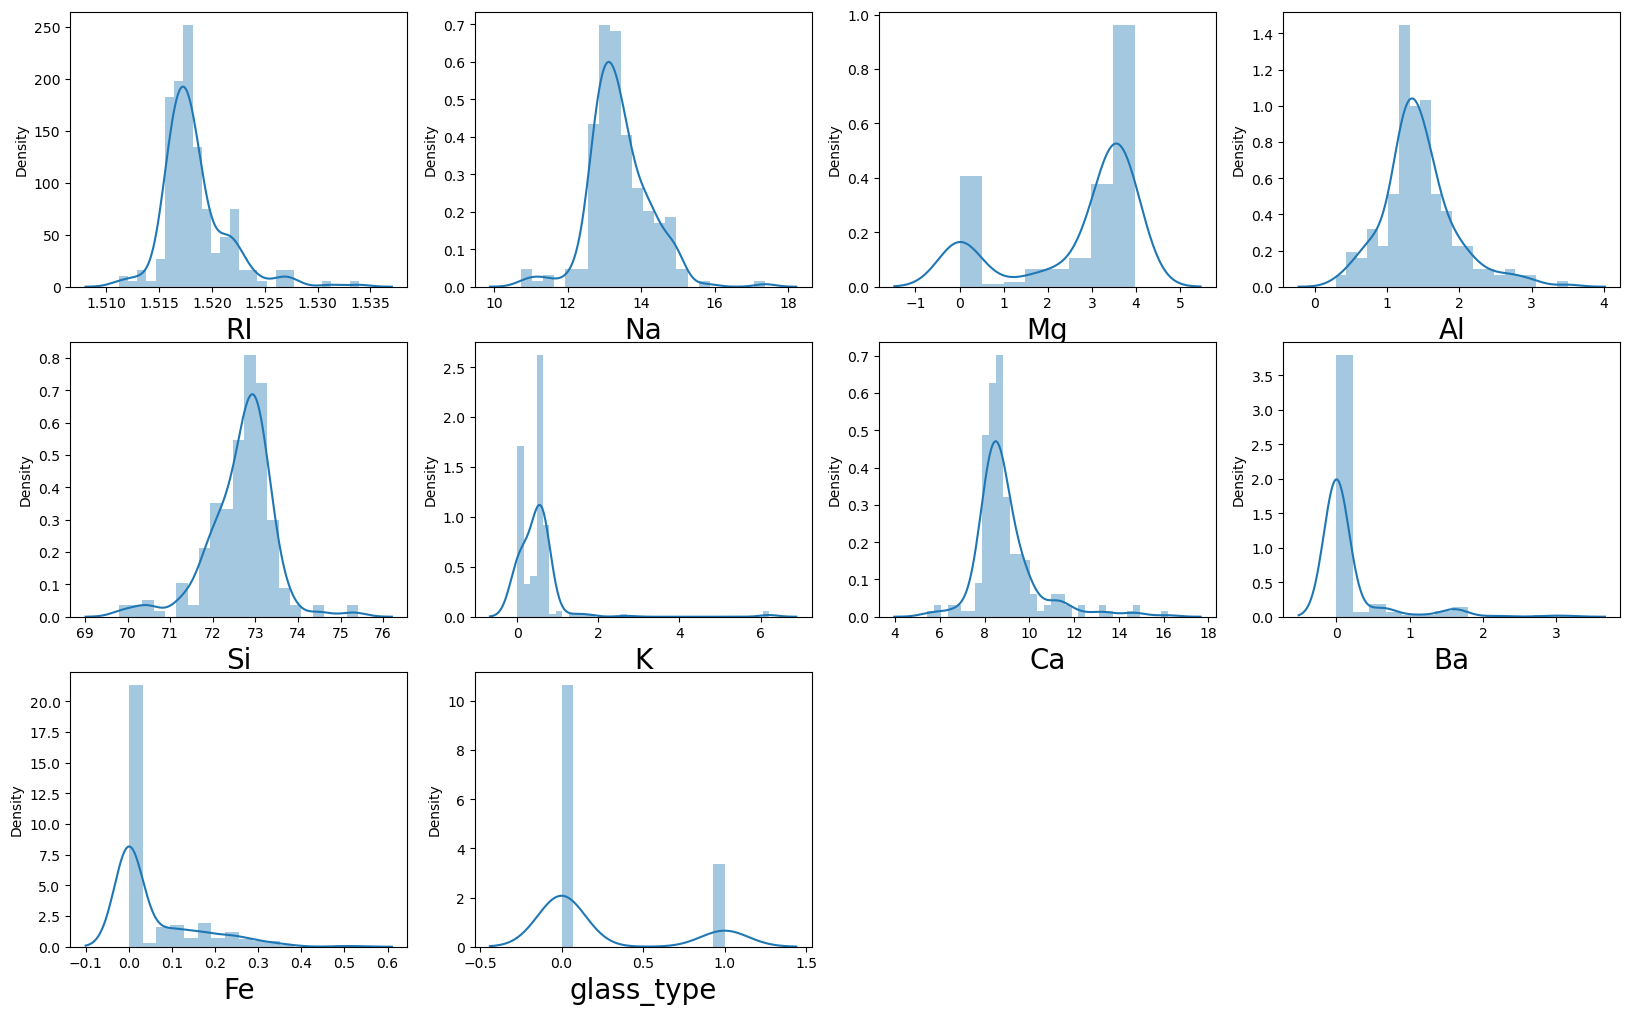

RI            1.639658
Na            0.457318
Mg           -1.154323
Al            0.900017
Si           -0.744546
K             6.549276
Ca            2.040591
Ba            3.406749
Fe            1.747173
glass_type    1.229860
dtype: float64

In [19]:
# seeing how the data has been distributed in all the columns with dist plot
plt.figure(figsize=(20,25))
plotnumber = 1
for column in glass_data:
    if plotnumber <= 10:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(glass_data[column])
        plt.xlabel(column,fontsize= 20)
    plotnumber +=1
plt.show()
glass_data.skew()

###  Applying Power Transformation to keep data on normal scale and also reduce the skewness.

In [23]:
# Separating features with outliers/skewness from label
features = ['RI', 'Na','Al','Si','K','Ca','Ba','Fe']



In [24]:
from  sklearn.preprocessing import PowerTransformer
scalar = PowerTransformer()

In [25]:
glass_data[features] = scalar.fit_transform(glass_data[features].values)

glass_data[features]

,RI,Na,Al,Si,K,Ca,Ba,Fe
0,-2.081668e-17,0.616990,-0.081445,0.038252,0.268575,-0.882521,-0.456097,-0.682180
1,-6.245005e-17,0.184792,0.286720,0.394607,0.011888,-0.936107,-0.456097,-0.682180
2,-2.081668e-17,-0.210310,-0.232162,-0.121300,0.496129,-0.487918,-0.456097,-0.682180
3,-2.775558e-17,-0.135420,-0.342629,0.521438,0.447821,-0.634960,-0.456097,-0.682180
4,-6.938894e-17,-0.745389,0.442150,0.366668,0.656025,-0.634960,-0.456097,1.715594
...,...,...,...,...,...,...,...,...
208,-6.245005e-17,0.909819,2.415518,-0.121300,-1.195502,0.333739,2.365582,-0.682180
209,-4.510281e-17,1.787436,1.104938,0.493096,-1.627123,-0.318743,2.371415,-0.682180
210,6.938894e-17,1.162750,1.155073,1.017262,-1.627123,-0.282179,2.371564,-0.682180
211,-5.204170e-17,1.185528,1.020265,1.306184,-1.627123,-0.245979,2.371347,-0.682180


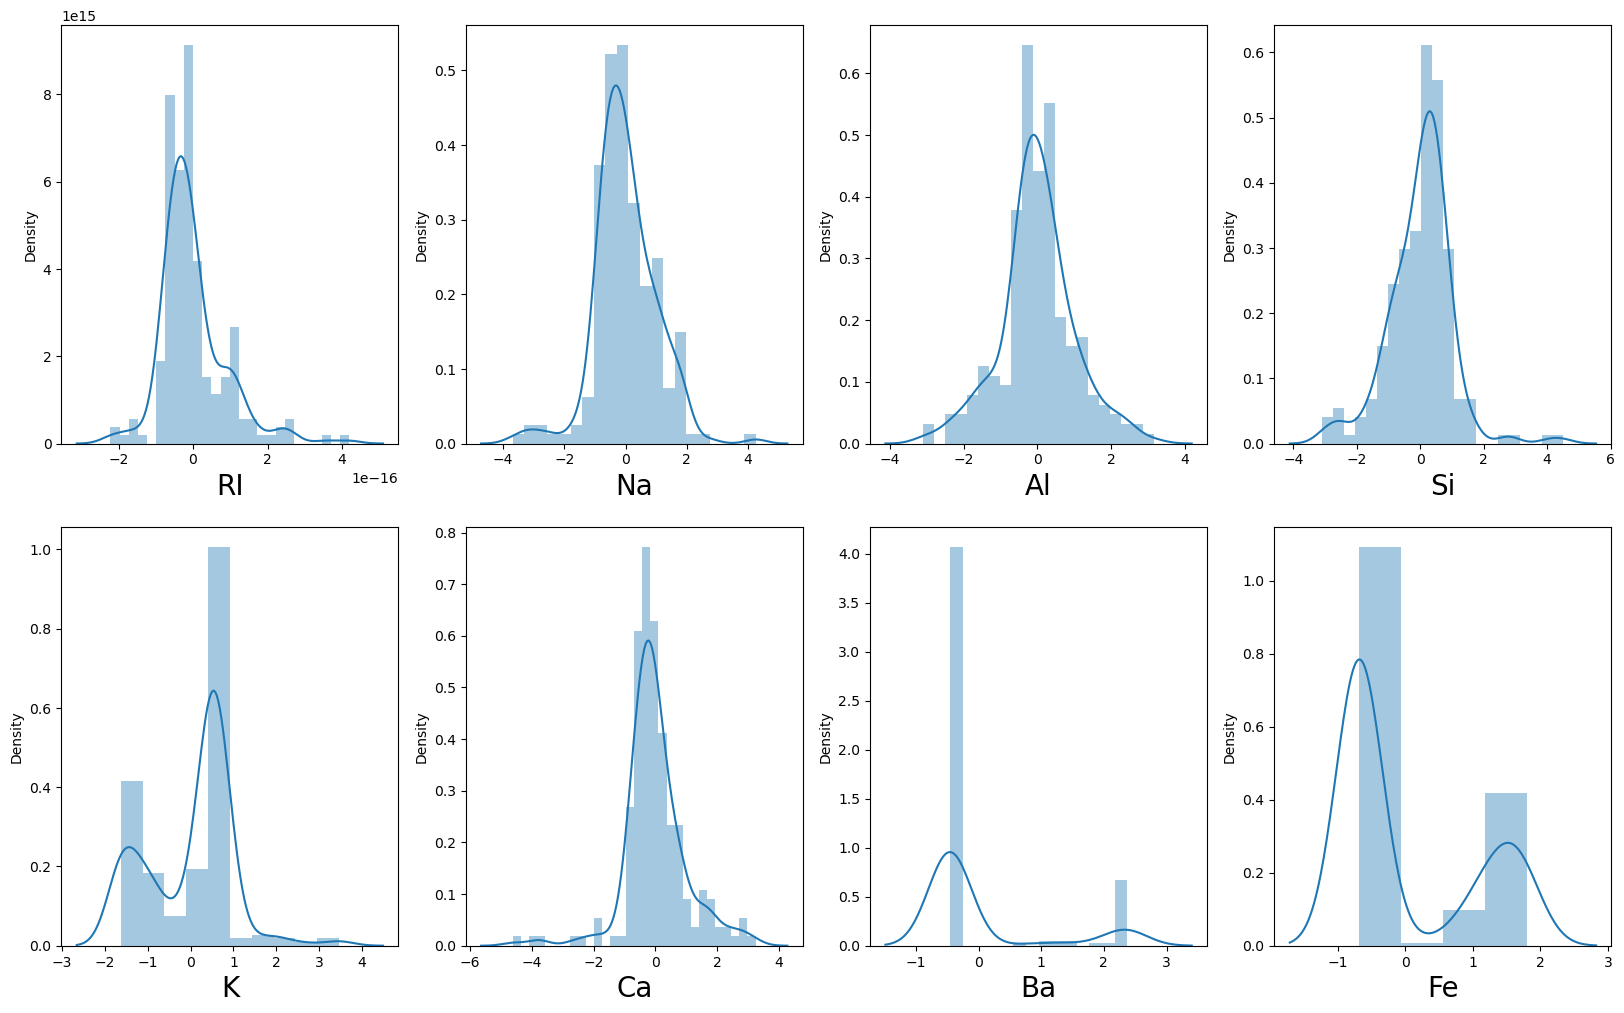

In [26]:
# seeing how the data has been distributed in all the columns after applying the power transformation
plt.figure(figsize=(20,25))
plotnumber = 1
for column in glass_data[features]:
    if plotnumber <= 8:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(glass_data[column])
        plt.xlabel(column,fontsize= 20)
    plotnumber +=1
plt.show()


In [27]:
# checking skewness 
glass_data.skew()

RI            0.000000
Na           -0.009526
Mg           -1.154323
Al            0.000874
Si            0.133867
K            -0.075233
Ca           -0.207808
Ba            1.817526
Fe            0.852473
glass_type    1.229860
dtype: float64

There is reduction in our skewness after power transformation

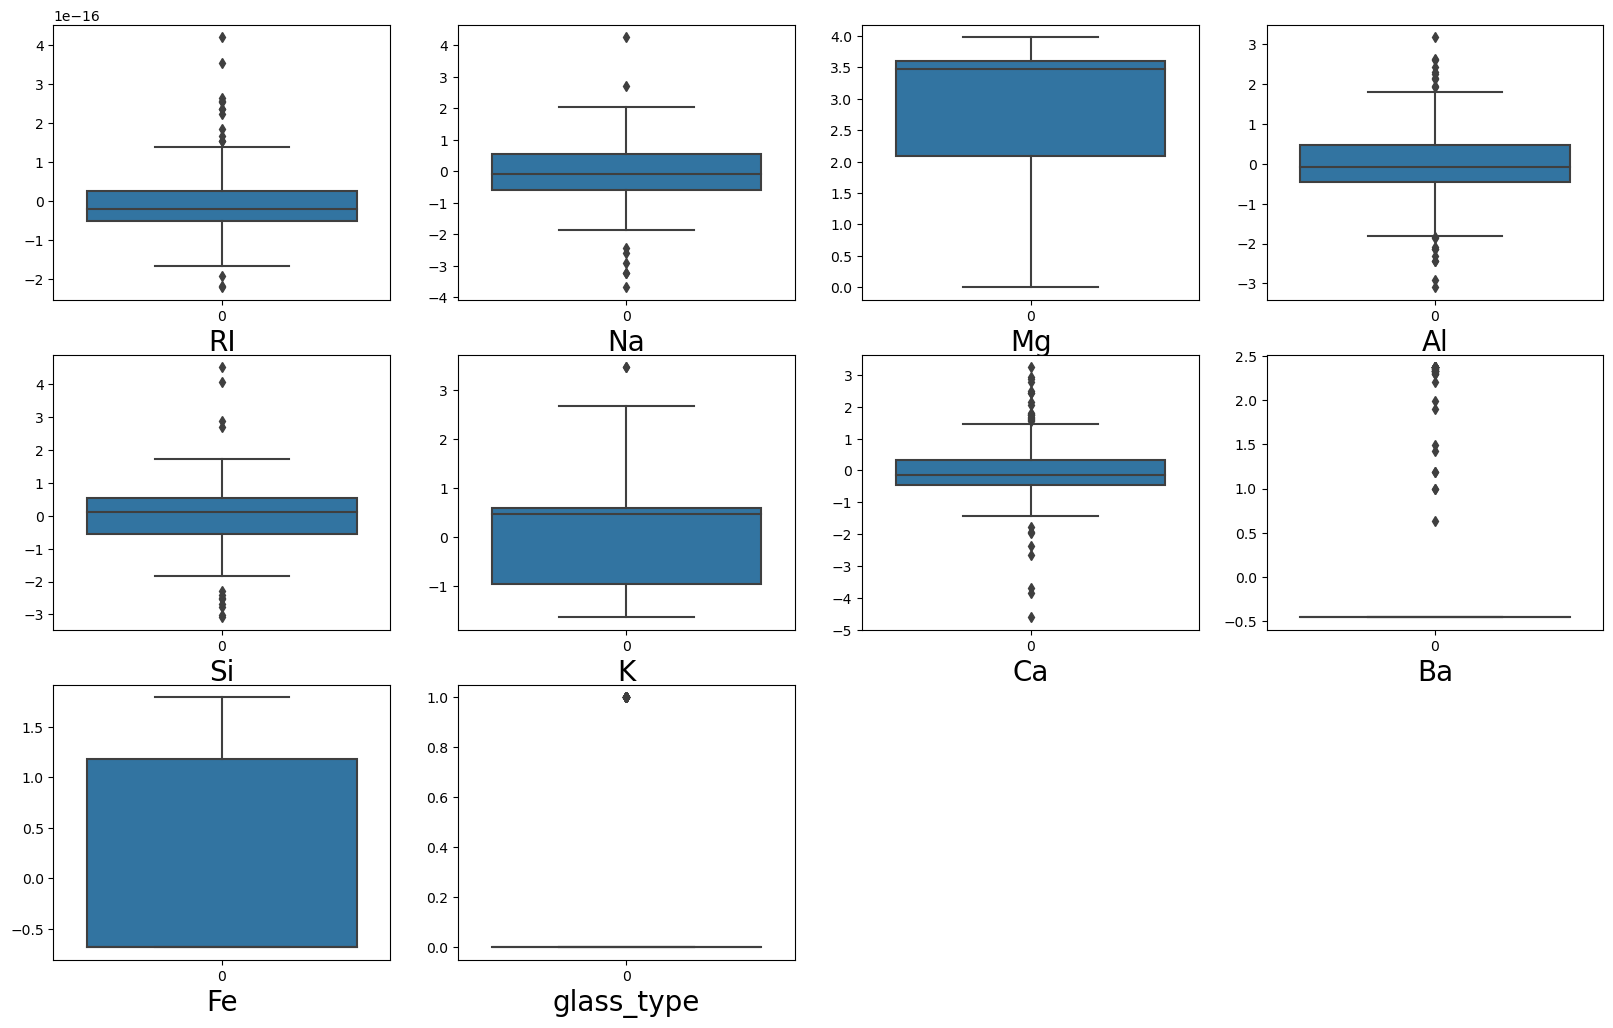

In [28]:
# checking outliers by ploting boxplot 
plt.figure(figsize=(20,25))
plotnumber = 1
for column in glass_data:
    if plotnumber <= 10:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(glass_data[column])
        plt.xlabel(column,fontsize= 20)
    plotnumber +=1
plt.show()

There are outliers in each features.

# Applying z-score to eliminate outliers 

In [29]:
from scipy.stats import zscore
z_score = zscore(glass_data[features])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score <3).all(axis = 1) 
glass_data = glass_data[filtering_entry]

In [30]:
glass_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,-3.330669e-18,0.035786,2.777000,-0.007553,0.034213,-0.048257,0.024480,-0.026898,0.020389
std,7.179656e-17,0.864884,1.377949,0.896725,0.815146,0.892836,0.756314,0.973245,1.007328
min,-1.942890e-16,-2.918823,0.000000,-2.444469,-2.696288,-1.627123,-2.647453,-0.456097,-0.682180
25%,-5.204170e-17,-0.564881,2.405000,-0.455558,-0.450338,-0.922470,-0.440149,-0.456097,-0.682180
50%,-2.081668e-17,-0.091910,3.490000,-0.081445,0.159949,0.447821,-0.139505,-0.456097,-0.682180
75%,2.168404e-17,0.527986,3.610000,0.442150,0.539199,0.572058,0.305062,-0.456097,1.182685
max,2.532696e-16,2.707416,3.980000,2.415518,2.869732,1.806813,2.867407,2.372396,1.794757


12 rows was lost from our counts values after removing the outliers

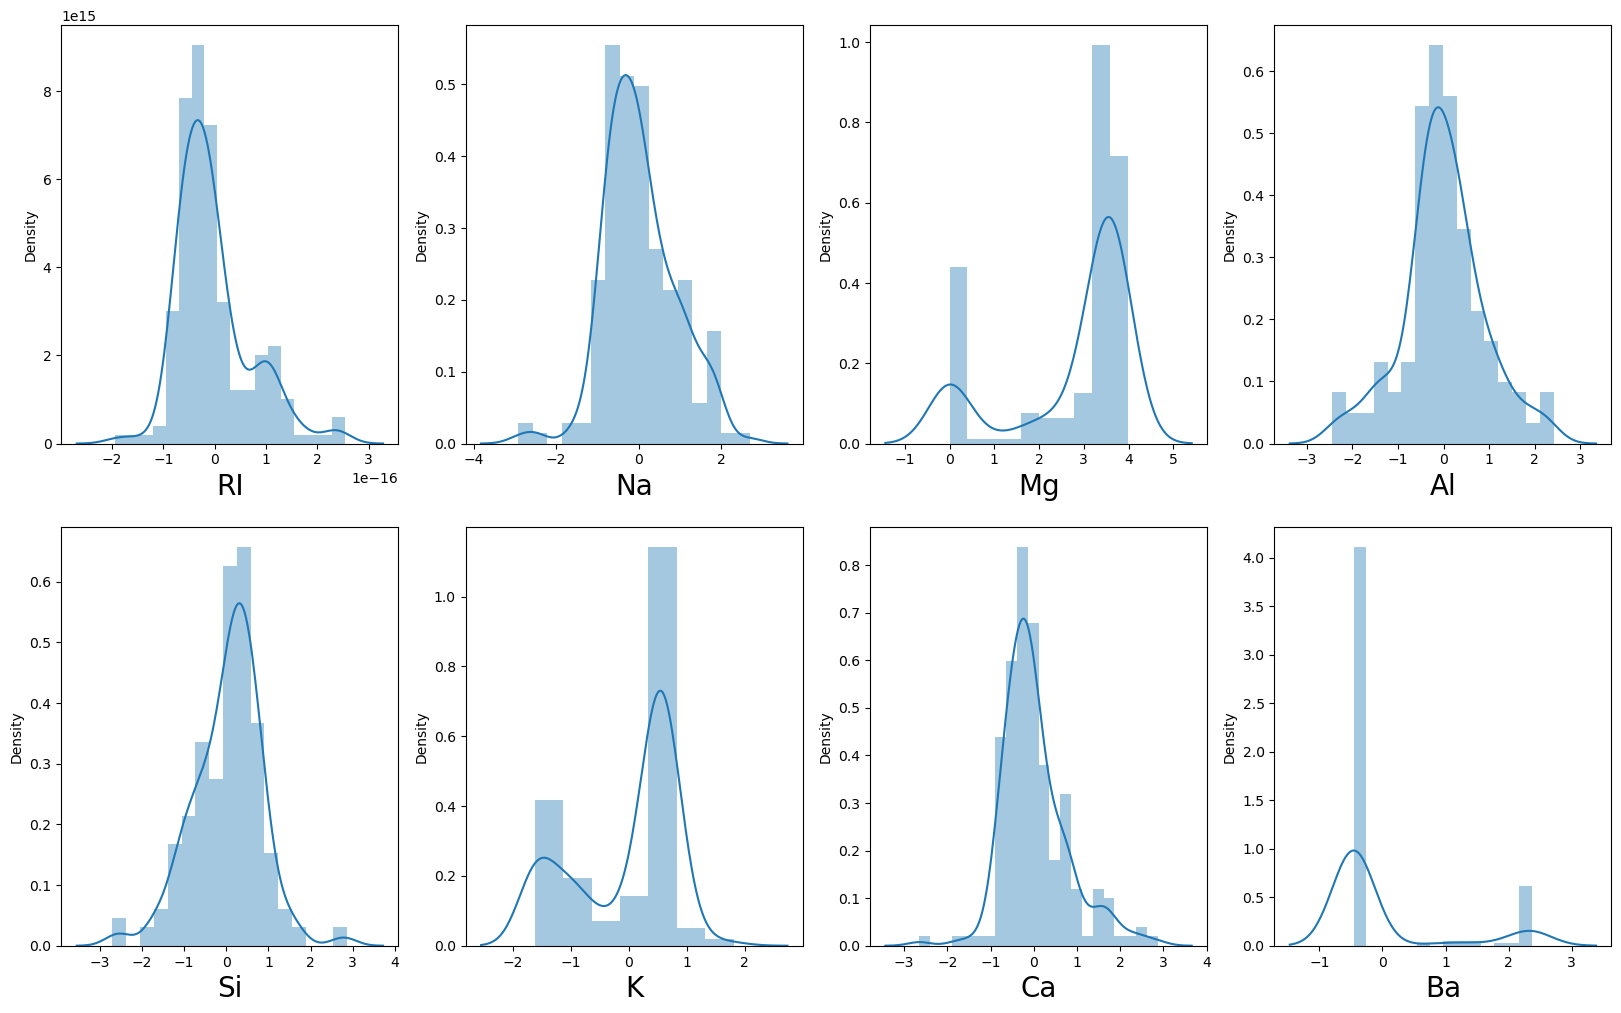

In [31]:
# lets check the data distribution one more time 
plt.figure(figsize=(20,25))
plotnumber = 1
for column in glass_data:
    if plotnumber <= 8:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(glass_data[column])
        plt.xlabel(column,fontsize= 20)
    plotnumber +=1
plt.show()

The data set almost normally distributed 

# Data Visualization
### Checking Correlation

In [32]:
# Finding out the correlation between the features 
corr = glass_data.corr()
corr.shape

(9, 9)

In [33]:
corr # The correlation contains 9 columns and 9 rows. So we are going to look for multicollinearity between features and Label

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,0.023400,-0.054506,-0.498836,-0.624523,-0.254215,0.722157,-0.165057,0.066696
Na,0.023400,1.000000,-0.431211,0.218969,-0.233908,-0.641989,-0.044348,0.542824,-0.190365
Mg,-0.054506,-0.431211,1.000000,-0.534713,-0.303877,0.539260,-0.433662,-0.645444,0.113044
Al,-0.498836,0.218969,-0.534713,1.000000,0.293688,-0.013944,-0.241347,0.550359,-0.085871
Si,-0.624523,-0.233908,-0.303877,0.293688,1.000000,0.008093,-0.247169,0.188856,-0.055856
K,-0.254215,-0.641989,0.539260,-0.013944,0.008093,1.000000,-0.412488,-0.471678,0.124542
Ca,0.722157,-0.044348,-0.433662,-0.241347,-0.247169,-0.412488,1.000000,-0.064965,0.059641
Ba,-0.165057,0.542824,-0.645444,0.550359,0.188856,-0.471678,-0.064965,1.000000,-0.041252
Fe,0.066696,-0.190365,0.113044,-0.085871,-0.055856,0.124542,0.059641,-0.041252,1.000000


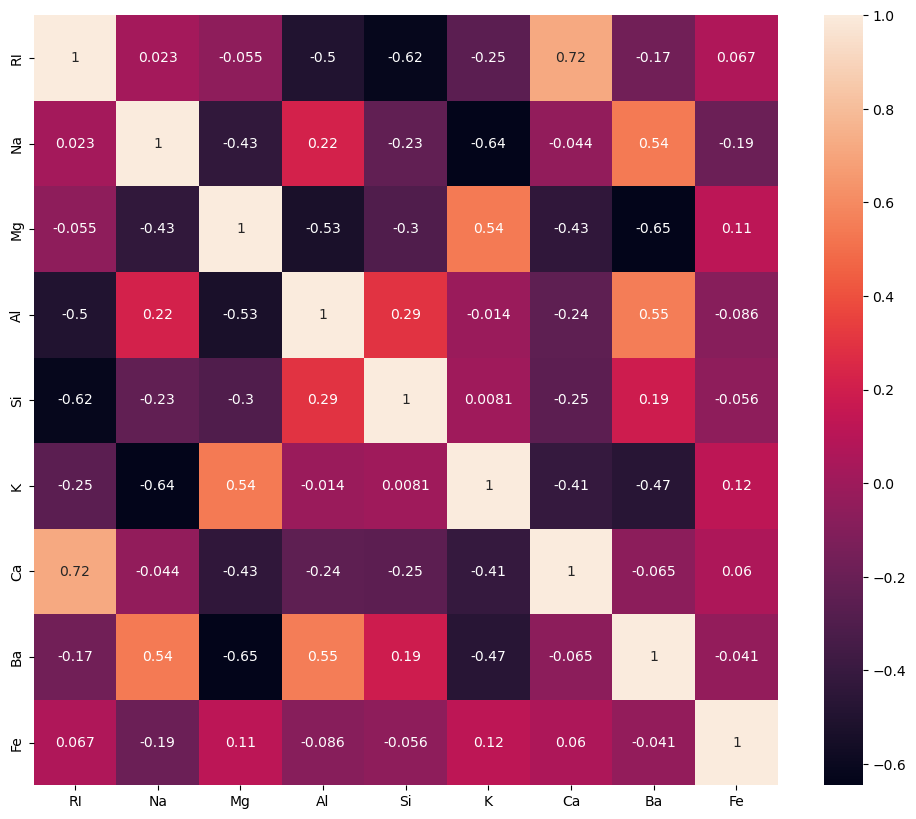

In [34]:
# Ploting the heatmap of correlation between the features
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show()

- The above heatmap shows the correlationship between two features.
- I am seeing less correlationship between all the features.


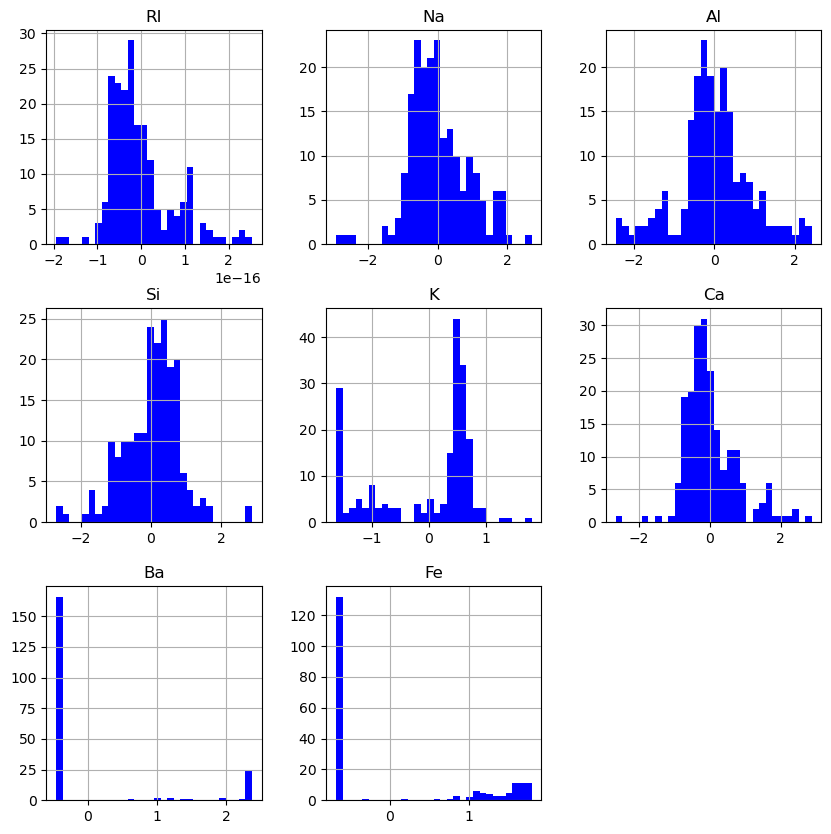

In [36]:
# display in figure using histogram as hist:

glass_data[features].hist(bins=30, figsize=(10,10), color='blue')
plt.show()

<Figure size 800x800 with 0 Axes>

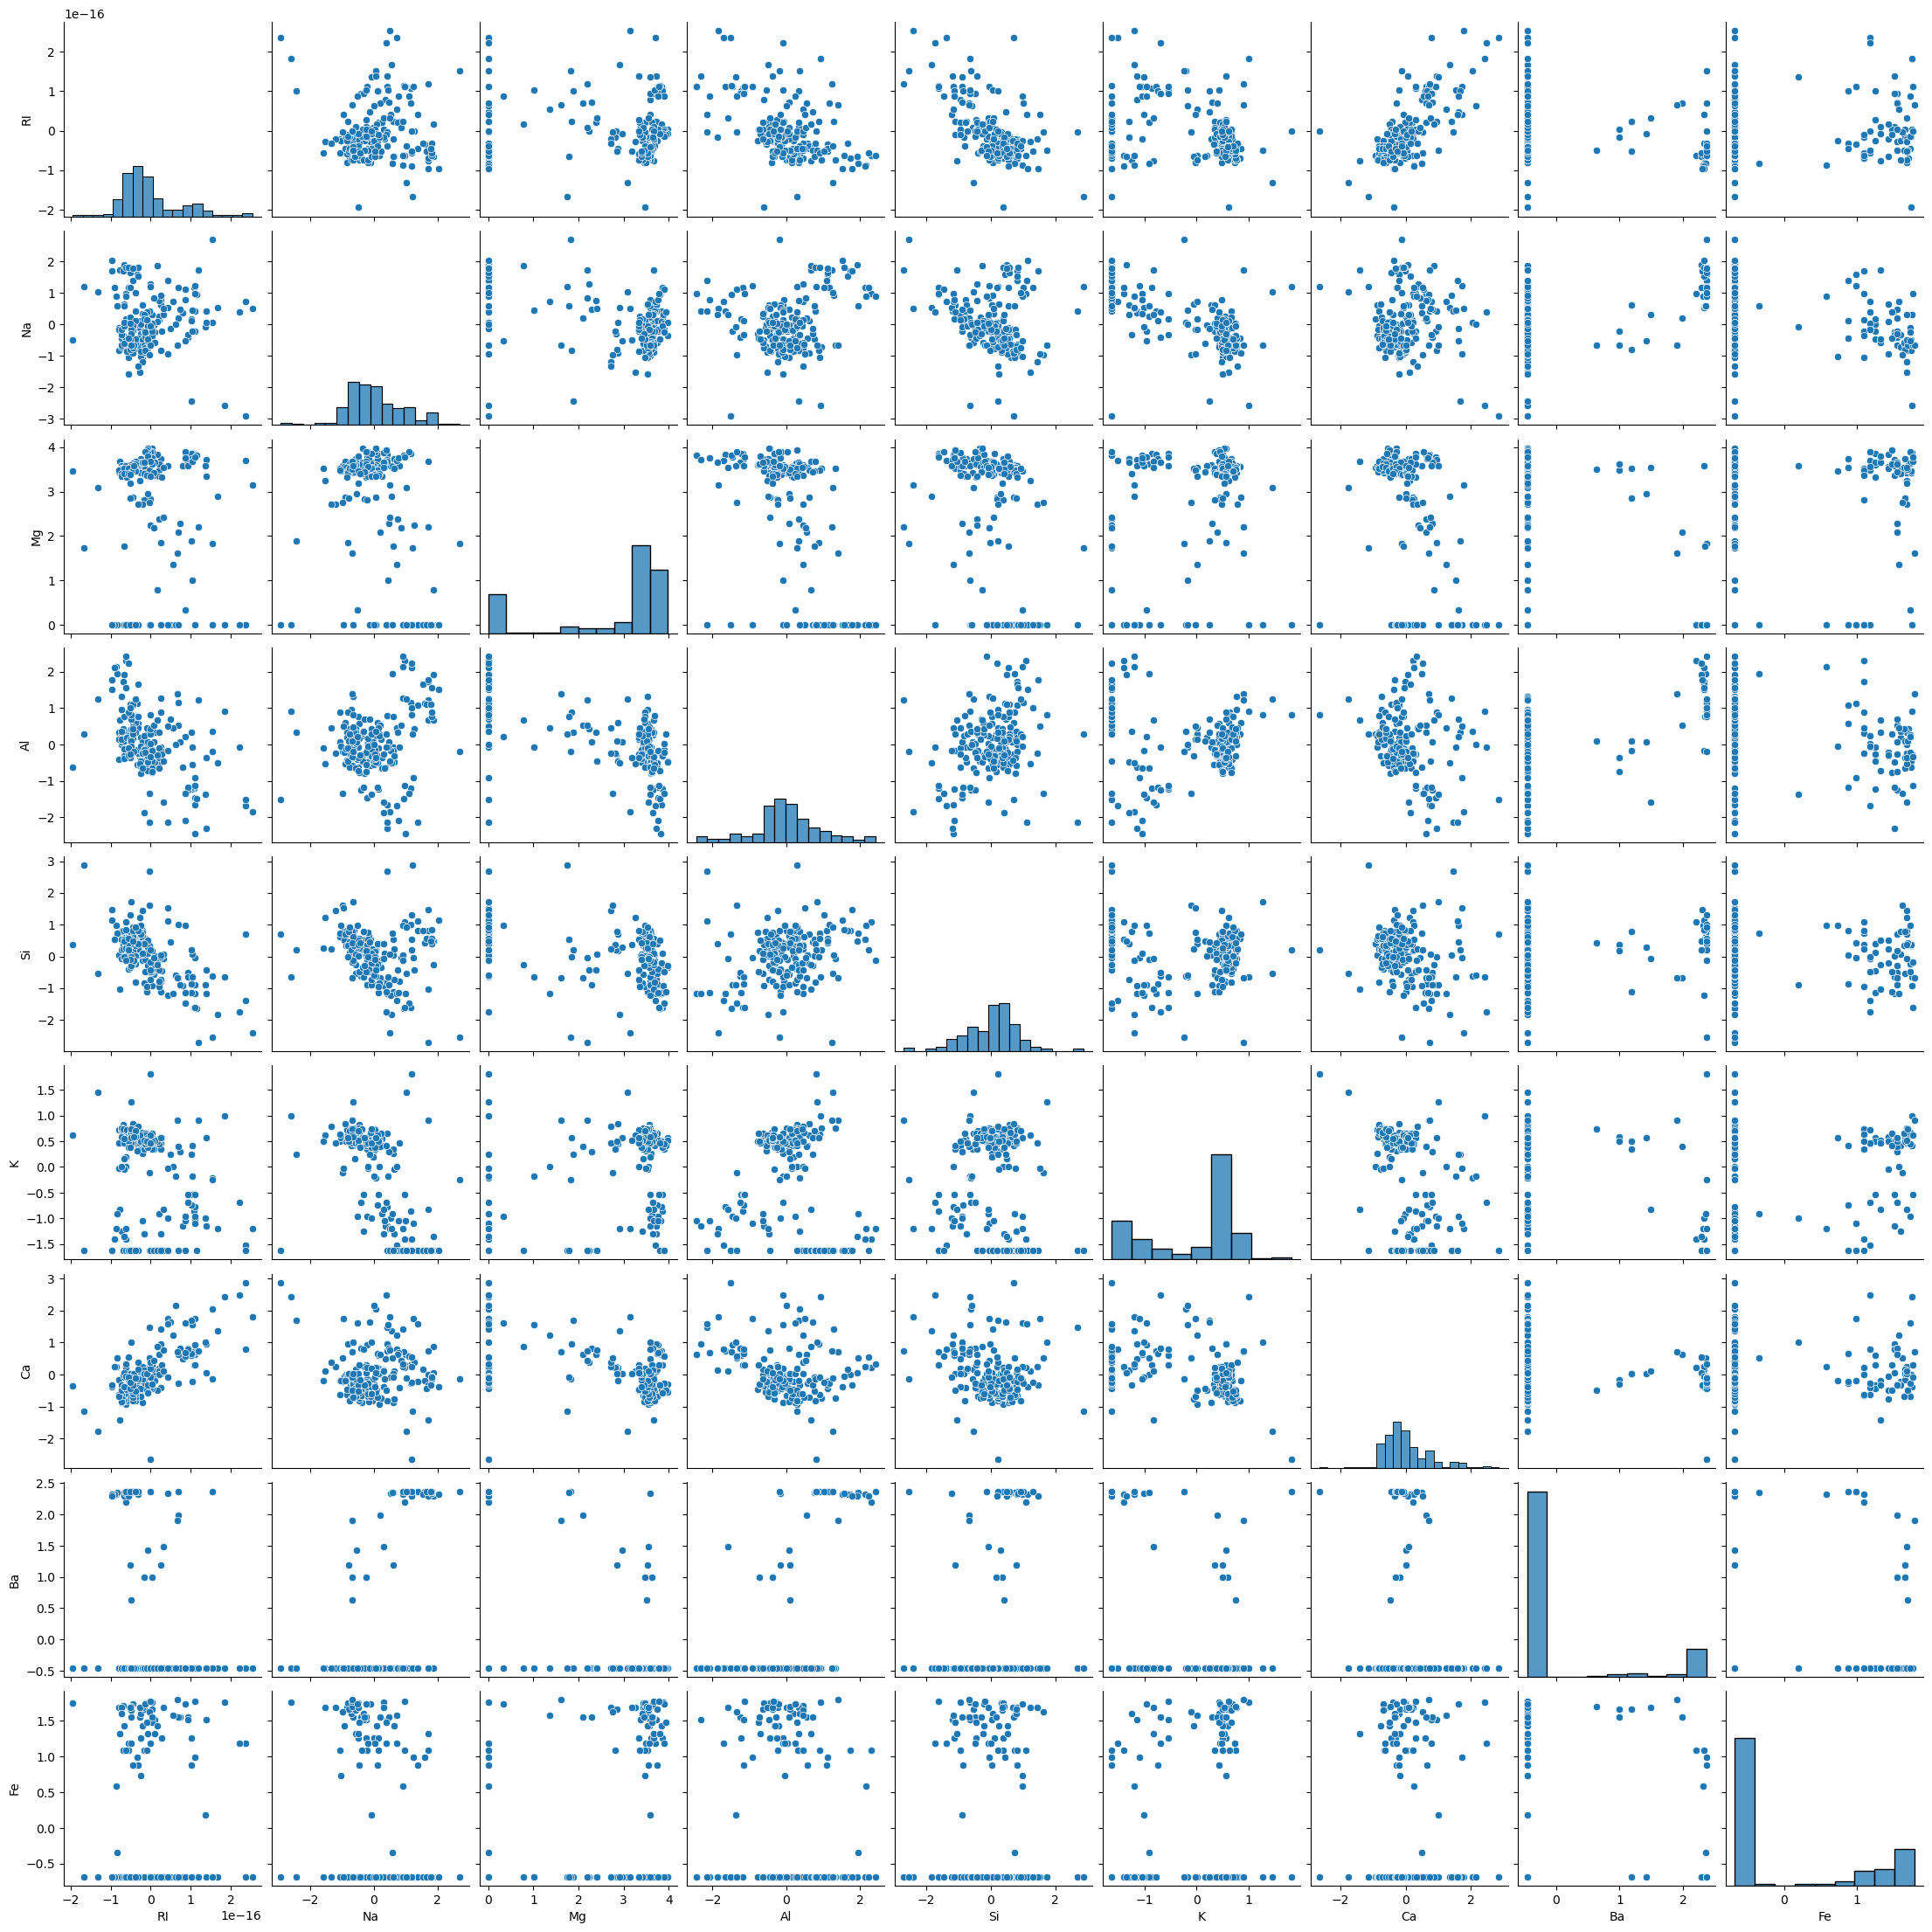

In [37]:
plt.figure(figsize=(8,8))
sns.pairplot(data=glass_data)
plt.show()

In [38]:
# Counter module to count each class

from collections import Counter
Counter(glass_data['glass_type'])

Counter({'0': 157, '1': 43})

It is clear that the label class is imbalance 

# Balancing label Class  

### spliting dataset into train and test

In [39]:
# droping Y 
x= glass_data.drop("glass_type",axis=1)
y=glass_data.glass_type

In [40]:
# slipting x,y train
from sklearn.model_selection import train_test_split, GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75,random_state=657)

In [41]:
Counter(y_train)

Counter({'0': 119, '1': 31})

I will be balancing the dataset. 

# Over Sampling using SMOTE

In [42]:
# importing over smapling 
from imblearn.over_sampling import SMOTE

In [43]:
ove_smp=SMOTE(random_state=41,k_neighbors=3,sampling_strategy=0.90) # 75% of your majority to be balance.

x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)

print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of Classes after fit {}".format(Counter(y_train_ns)))
print('End of preprocessing ')

The number of classes before fit Counter({'0': 119, '1': 31})
The number of Classes after fit Counter({'0': 119, '1': 107})
End of preprocessing 


# Model Building 

In [44]:
# Importing necessary classification Algorithm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Creating instances 

In [45]:
dc = DecisionTreeClassifier()
lr = LogisticRegression()
rdf = RandomForestClassifier()
etr = ExtraTreesClassifier()
svc = SVC()
knn = KNeighborsClassifier()
gdb = GradientBoostingClassifier()
ada = AdaBoostClassifier()

models = [dc,lr,rdf,etr,svc,knn,gdb,ada]


# Learning Process 

In [46]:
for model in models:
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size= 0.25, random_state=657)
    
    model.fit(x_train, y_train)
    model.fit(x_test, y_test)
    y_pred = model.predict(x_test)
      
    
    
    print(f'*************************{model}*************************')
    
    print ("The training score is: ",(model.score(x_train, y_train))*100) # Training Score
    print ("The testing score is: ",model.score(x_test, y_test)*100) # Testing Score
    print ("The Accuracy is: ", accuracy_score(y_test, y_pred)*100)
    print ("The CV score is: ",(cross_val_score(model, x, y, cv=5).mean())*100) #Cross Validation Score taken as 5
    print ("Difference between Accuracy_Score and CV score is: ",((accuracy_score(y_test, y_pred)*100)-((cross_val_score(model, x, y, cv=5).mean())*100)))
    print ('\n')
   
    print("The Confusion Matrix is: \n", confusion_matrix(y_test, y_pred))
    print ('\n')
    
       
    print("Classification Report: \n", classification_report(y_test, y_pred))
    print ("----------------------------------------------------")
    print('\n')

*************************DecisionTreeClassifier()*************************
The training score is:  94.0
The testing score is:  100.0
The Accuracy is:  100.0
The CV score is:  88.5
Difference between Accuracy_Score and CV score is:  13.000000000000014


The Confusion Matrix is: 
 [[38  0]
 [ 0 12]]


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        12

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

----------------------------------------------------


*************************LogisticRegression()*************************
The training score is:  92.66666666666666
The testing score is:  98.0
The Accuracy is:  98.0
The CV score is:  88.5
Difference between Accuracy_Score and CV score is:  9.5


The Confusion Matrix is: 
 [[38  0]
 [ 1 11]]



# KNN is the best model in this data set.

##  Tunning KNN

In [47]:
# using GridSearchCV for the best parameter to improve the accuracy
from sklearn.model_selection import GridSearchCV

In [48]:
param_grid = {'algorithm':['kd_tree', 'brute'],
              'leaf_size':[3,5,6,7,8],
               'n_neighbors':[3,5,7,9,11,13]}

In [49]:
# assigning KNeighborsClassifier into a new object knn_2
knn_2 = KNeighborsClassifier()

In [50]:
gridsearch = GridSearchCV(estimator= knn_2, param_grid=param_grid)

In [51]:
# training GridSearch 
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [52]:
print('Training best score:', gridsearch.best_score_)

Training best score: 0.9200000000000002


In [53]:
gridsearch.best_estimator_

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=3)

In [55]:
tuned_knn = KNeighborsClassifier(algorithm ='kd_tree',leaf_size=3, n_neighbors=3)
tuned_knn.fit(x_train,y_train)
tuned_knn.fit(x_test, y_test)
y_pred = tuned_knn.predict(x_test)
      
    
    
print(f'*************************{model}*************************')
   
print ("The training score is: ",(tuned_knn.score(x_train, y_train))*100) # Training Score
print ("The testing score is: ",tuned_knn.score(x_test, y_test)*100) # Training Score
print ("The Accuracy is: ", accuracy_score(y_test, y_pred)*100)
print ("The CV score is: ",(cross_val_score(tuned_knn, x, y, cv=5).mean())*100) #Cross Validation Score taken as 5
print ("Difference between Accuracy_Score and CV score is: ",((accuracy_score(y_test, y_pred)*100)-((cross_val_score(tuned_knn, x, y, cv=5).mean())*100)))
print ('\n')
  
print("The Confusion Matrix is: \n", confusion_matrix(y_test, y_pred))
print ('\n')
    
       
print("Classification Report: \n", classification_report(y_test, y_pred))
print ("----------------------------------------------------")
print('\n')




*************************AdaBoostClassifier()*************************
The training score is:  92.66666666666666
The testing score is:  96.0
The Accuracy is:  96.0
The CV score is:  89.0
Difference between Accuracy_Score and CV score is:  7.0


The Confusion Matrix is: 
 [[38  0]
 [ 2 10]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        38
           1       1.00      0.83      0.91        12

    accuracy                           0.96        50
   macro avg       0.97      0.92      0.94        50
weighted avg       0.96      0.96      0.96        50

----------------------------------------------------




# Saving Model 

In [56]:
import pickle

In [57]:
pickle.dump(tuned_knn, open('Glass_Identification_Classification_project','wb'))